In [1]:
pip install pandas matplotlib seaborn pyarrow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow.parquet as pq


In [3]:
data = pd.read_parquet(r'C:\Users\sdestine\Downloads\training_data_sampled.parq')

In [4]:
print(data.head())

   blue  green  red  NIR  SWIR1  SWIR2  dNBR  dNDVI  dNDII  y  \
0   0.0    0.0  0.0  0.0    0.0    0.0   0.0    0.0    0.0  0   
1   0.0    0.0  0.0  0.0    0.0    0.0   0.0    0.0    0.0  0   
2   0.0    0.0  0.0  0.0    0.0    0.0   0.0    0.0    0.0  0   
3   0.0    0.0  0.0  0.0    0.0    0.0   0.0    0.0    0.0  0   
4   0.0    0.0  0.0  0.0    0.0    0.0   0.0    0.0    0.0  0   

                                               Fname  
0  /explore/nobackup/people/spotter5/cnn_mapping/...  
1  /explore/nobackup/people/spotter5/cnn_mapping/...  
2  /explore/nobackup/people/spotter5/cnn_mapping/...  
3  /explore/nobackup/people/spotter5/cnn_mapping/...  
4  /explore/nobackup/people/spotter5/cnn_mapping/...  


In [5]:
print(data.describe())

               blue         green           red           NIR         SWIR1  \
count  1.282815e+08  1.282815e+08  1.282815e+08  1.282815e+08  1.282815e+08   
mean  -3.008432e-03 -1.154606e-03 -1.950778e-03  1.120876e-02 -3.324250e-03   
std    1.910618e-01  9.521749e-02  1.002425e-01  8.448290e-02  5.289190e-02   
min   -3.276800e+01 -8.590000e+00 -9.411000e+00 -1.566000e+00 -1.592000e+00   
25%   -4.000000e-03 -3.000000e-03 -4.000000e-03 -1.000000e-02 -1.500000e-02   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    5.000000e-03  7.000000e-03  6.000000e-03  3.400000e-02  1.200000e-02   
max    3.276700e+01  2.086000e+00  9.436000e+00  1.544000e+00  1.518000e+00   

              SWIR2          dNBR         dNDVI         dNDII             y  
count  1.282815e+08  1.282815e+08  1.282815e+08  1.282815e+08  1.282815e+08  
mean  -7.964424e-03  7.137825e-02  2.505543e-02  4.822176e-02  2.062491e-01  
std    4.134756e-02  1.960547e-01  1.326549e-01  1.359

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128281516 entries, 0 to 128281515
Data columns (total 11 columns):
 #   Column  Dtype  
---  ------  -----  
 0   blue    float64
 1   green   float64
 2   red     float64
 3   NIR     float64
 4   SWIR1   float64
 5   SWIR2   float64
 6   dNBR    float64
 7   dNDVI   float64
 8   dNDII   float64
 9   y       int16  
 10  Fname   object 
dtypes: float64(9), int16(1), object(1)
memory usage: 9.8+ GB
None


In [7]:
# Identify float64 columns
float64_columns = data.select_dtypes(include=['float64']).columns

for column in float64_columns:
    data[column] = data[column].astype('float32')

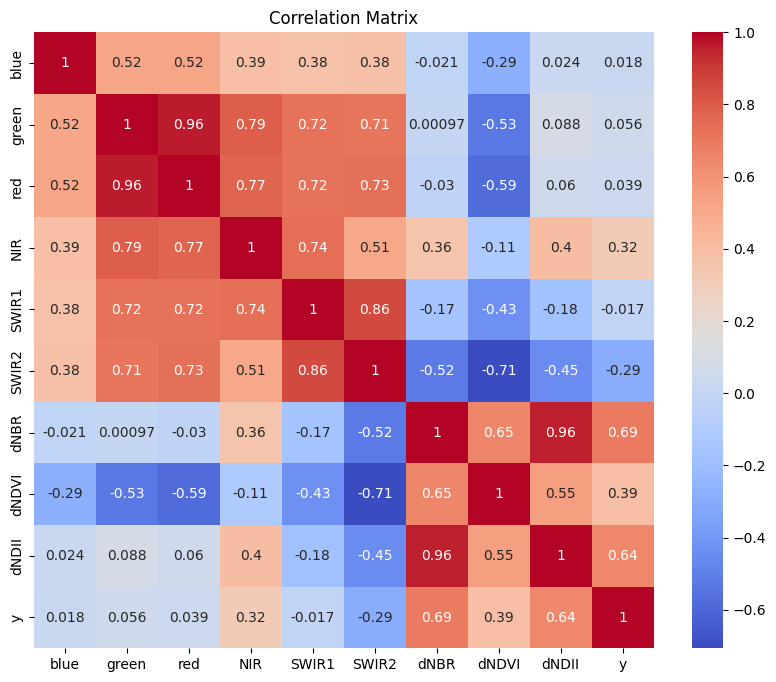

In [8]:
numerical_data = data.select_dtypes(include=['float32', 'int16'])
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=numerical_data, orient='h', palette='Set2')
plt.title('Box Plot of Numerical Variables')
plt.show()

In [ ]:
#for column in numerical_data.columns:
   # plt.figure(figsize=(8, 6))
    #sns.histplot(data=numerical_data[column], kde=True, bins=20)
   # plt.title(f'Histogram of {column}')
    #plt.xlabel(column)
   # plt.ylabel('Frequency')
   # plt.show()

In [ ]:
missing_values = data.isnull().sum()

In [ ]:
missing_values

blue     0
green    0
red      0
NIR      0
SWIR1    0
SWIR2    0
dNBR     0
dNDVI    0
dNDII    0
y        0
Fname    0
dtype: int64

In [ ]:
missing_percentage = (data.isnull().sum() / len(data)) * 100

In [ ]:
missing_percentage

blue     0.0
green    0.0
red      0.0
NIR      0.0
SWIR1    0.0
SWIR2    0.0
dNBR     0.0
dNDVI    0.0
dNDII    0.0
y        0.0
Fname    0.0
dtype: float64

In [ ]:
# Group by 'Category' and calculate mean and standard deviation for 'y'
grouped_data = df.groupby('Category')['y'].agg(['mean', 'std']).reset_index()

# Create a bar chart to visualize the means with error bars (standard deviation)
plt.figure(figsize=(8, 6))
sns.barplot(data=grouped_data, x='Category', y='mean', yerr=grouped_data['std'], capsize=0.1, palette='Set3')
plt.title('Mean and Standard Deviation of "y" by Category')
plt.xlabel('Category')
plt.ylabel('Mean "y" Value')
plt.show()

C:\Users\sdestine\AppData\Local\Temp\ipykernel_9324\1577409604.py:6: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std_dev = data.drop('y', axis=1).std()


What are the variables? 
* blue = 
* green = 
* red = 
* NIR = Near infrared
* SWIR1 = Shortwave infrared 1
* SWIR2 = Shortwave infrared 2
* dNBR = A higher value of dNBR indicates more severe damage, while areas with negative dNBR values may indicate regrowth following a fire. Difference between pre-fire and post-fire normalized burn ratio. 
* dNDVI = Normalized difference vegetation index (NDVI) is a vegetation index that is used to measure the greenness of the area. NDVI values range from -1.0 to 1.0, with negative values indicating clouds and water, positive values near zero indicating bare soil, and higher positive values of NDVI ranging from sparse vegetation (0.1 - 0.5) to dense green vegetation (0.6 and above).
* dNDVII = Normailized difference Infrared INdex to detect vegetation moisture content
* y = 